# Plot zonal-mean time-mean cloud-radiative heating

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## R05

In [2]:
ds=xr.open_dataset("/jetfs/scratch/avoigt/CLOUDSAT/2B-FLXHR-LIDAR.P2_R05.heatingrates_binned.2006-2017.nc")

Group by years. Average over years 2007-2016 as well as longitude. Do not use years 2006 and 2017 as these might not be complete.

Also do an average from 2007-2010 only, as this is before Cloudsata lost its battery and began to be restricted by daylight operations. Also, 2011 is not complete.

In [3]:
ds_mean=ds.groupby(ds.time.dt.year).mean("time").sel(year=slice(2007,2016)).mean(["year","lon"])
ds_mean_20072010=ds.groupby(ds.time.dt.year).mean("time").sel(year=slice(2007,2010)).mean(["year","lon"])

## Repeat for R04

In [4]:
ds_r04=xr.open_dataset("/jetfs/scratch/avoigt/CLOUDSAT/2B-FLXHR-LIDAR.P2_R04.heatingrates_binned.2006-2011.nc")
ds_r04_mean_20072010=ds_r04.groupby(ds_r04.time.dt.year).mean("time").sel(year=slice(2007,2010)).mean(["year","lon"])

## Plotting

R05

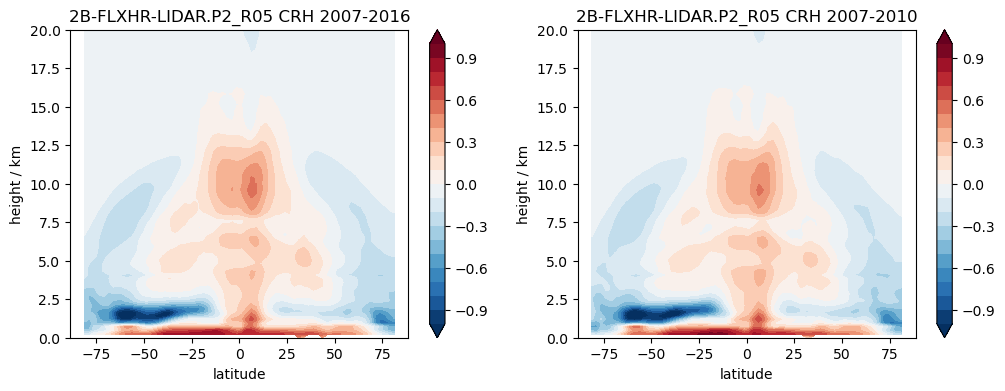

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.contourf(ds_mean.lat, ds_mean.height/1000, ds_mean["HR_allsky_sw"]+ds_mean["HR_allsky_lw"]
             -(ds_mean["HR_clrsky_sw"]+ds_mean["HR_clrsky_lw"]), cmap="RdBu_r", levels=np.linspace(-1,1,21), extend="both")
plt.colorbar()
plt.xlabel("latitude")
plt.ylabel("height / km")
plt.title("2B-FLXHR-LIDAR.P2_R05 CRH 2007-2016")
plt.ylim(0,20);

plt.subplot(1,2,2)
plt.contourf(ds_mean_20072010.lat, ds_mean_20072010.height/1000, ds_mean_20072010["HR_allsky_sw"]+ds_mean_20072010["HR_allsky_lw"]
             -(ds_mean_20072010["HR_clrsky_sw"]+ds_mean_20072010["HR_clrsky_lw"]), cmap="RdBu_r", levels=np.linspace(-1,1,21), extend="both")
plt.colorbar()
plt.xlabel("latitude")
plt.ylabel("height / km")
plt.title("2B-FLXHR-LIDAR.P2_R05 CRH 2007-2010")
plt.ylim(0,20);

plt.savefig("crh_2B-FLXHR-LIDAR_R05.zonmean.timmean.pdf")

Joint plot of R05 and R04 for 2007-2010 and difference between the two

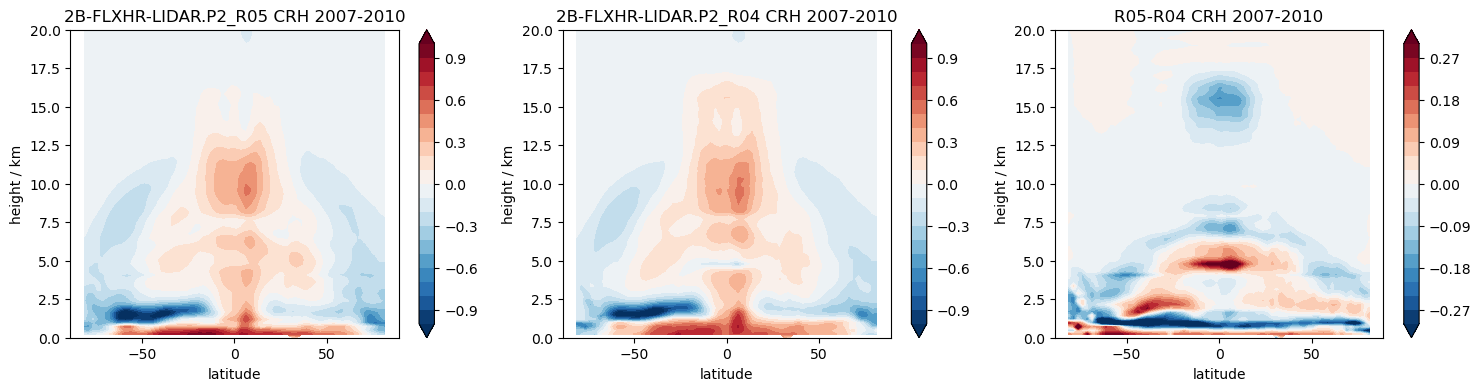

In [6]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
plt.contourf(ds_mean_20072010.lat, ds_mean_20072010.height/1000, ds_mean_20072010["HR_allsky_sw"]+ds_mean_20072010["HR_allsky_lw"]
             -(ds_mean_20072010["HR_clrsky_sw"]+ds_mean_20072010["HR_clrsky_lw"]), cmap="RdBu_r", levels=np.linspace(-1,1,21), extend="both")
plt.colorbar()
plt.xlabel("latitude")
plt.ylabel("height / km")
plt.title("2B-FLXHR-LIDAR.P2_R05 CRH 2007-2010")
plt.ylim(0,20)

plt.subplot(1,3,2)
plt.contourf(ds_r04_mean_20072010.lat, ds_r04_mean_20072010.height/1000, ds_r04_mean_20072010["HR_allsky_sw"]+ds_r04_mean_20072010["HR_allsky_lw"]
             -(ds_r04_mean_20072010["HR_clrsky_sw"]+ds_r04_mean_20072010["HR_clrsky_lw"]), cmap="RdBu_r", levels=np.linspace(-1,1,21), extend="both")
plt.colorbar()
plt.xlabel("latitude")
plt.ylabel("height / km")
plt.title("2B-FLXHR-LIDAR.P2_R04 CRH 2007-2010")
plt.ylim(0,20)

plt.subplot(1,3,3)
plt.contourf(ds_mean_20072010.lat, ds_mean_20072010.height/1000, 
             ( ds_mean_20072010["HR_allsky_sw"].values+ds_mean_20072010["HR_allsky_lw"].values-(ds_mean_20072010["HR_clrsky_sw"].values+ds_mean_20072010["HR_clrsky_lw"].values) ) -
             ( ds_r04_mean_20072010["HR_allsky_sw"].values+ds_r04_mean_20072010["HR_allsky_lw"].values-(ds_r04_mean_20072010["HR_clrsky_sw"].values+ds_r04_mean_20072010["HR_clrsky_lw"].values) ),
             cmap="RdBu_r", levels=0.3*np.linspace(-1,1,21), extend="both")
plt.colorbar()
plt.xlabel("latitude")
plt.ylabel("height / km")
plt.title("R05-R04 CRH 2007-2010")
plt.ylim(0,20)

plt.savefig("crh_2B-FLXHR-LIDAR_R05-vs-R04_2007-2010.zonmean.timmean.pdf")

## Finally also plot previously computed CRH by Papavasileiou et al. for comparison with R04

This data is also for R04 and was computed by Pavapasileiou et al, QJRMS, 2018, https://rmets.onlinelibrary.wiley.com/doi/10.1002/qj.3768. It is a time mean from 2006-2011, instead of 2007-2011.
The data is downloaded from https://zenodo.org/records/7236564 --> domain-mean_data.zip --> cloudsat_calipso_global_3d_acre_multiyear_clim.nc.

In [7]:
# because the Papavasileiou data is from 2006-2011, compute time mean for R04 over same period
ds_r04_mean=ds_r04.groupby(ds_r04.time.dt.year).mean("time").mean(["year","lon"])

In [8]:
p2018 = xr.open_dataset("./papavasileiou2018/cloudsat_calipso_global_3d_acre_multiyear_clim.nc")

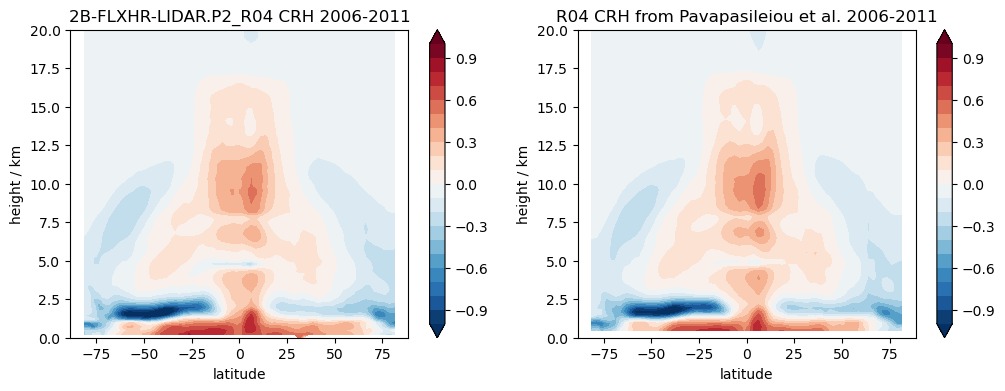

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.contourf(ds_r04_mean.lat, ds_r04_mean.height/1000, ds_r04_mean["HR_allsky_sw"]+ds_r04_mean["HR_allsky_lw"]
             -(ds_r04_mean["HR_clrsky_sw"]+ds_r04_mean["HR_clrsky_lw"]), cmap="RdBu_r", levels=np.linspace(-1,1,21), extend="both")
plt.colorbar()
plt.xlabel("latitude")
plt.ylabel("height / km")
plt.title("2B-FLXHR-LIDAR.P2_R04 CRH 2006-2011")
plt.ylim(0,20);

plt.subplot(1,2,2)
plt.contourf(p2018.lat, p2018.lev/1000, p2018["acre_clim"].mean("lon").squeeze(),
             cmap="RdBu_r", levels=1.0*np.linspace(-1,1,21), extend="both")
plt.colorbar()
plt.xlabel("latitude")
plt.ylabel("height / km")
plt.title("R04 CRH from Pavapasileiou et al. 2006-2011")
plt.ylim(0,20);

plt.savefig("crh_2B-FLXHR-LIDAR_R04-vs-papavasileiou2018_2006-2011.zonmean.timmean.pdf")

**Conclusion: while some differences remain between R04 2006-2011 and the Papavasilieou et al. data, the match is close enough and it does not seem worth digging into this differences further. The analysis of CRH is thus assessed to be technically correct.**